In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import status
from sklearn.preprocessing import LabelEncoder


In [12]:
pd.read_csv("data/casas_rm.csv")

,Direccion,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi
0,"Macul, Mario Silva Ossa 3923",266395950,7650.0,94,340,4,2,0,03/12/2022
1,"Maipú, Mataquito 2239",3490,0.1,56,128,5,1,3,03/12/2022
2,"Santiago, Campomar 4",870575000,25000.0,0,0,9,6,0,02/12/2022
3,"Estación Central, Blanco Garcés 50",100081302,2874.0,72,72,3,2,0,02/12/2022
4,"Estación Central, Avenida Las Parcelas",135809700,3900.0,59,243,3,1,2,02/12/2022
...,...,...,...,...,...,...,...,...,...
5966,"La Florida, Lia Aguirre / Vicuña Mackenna",367730880,10560.0,145,220,6,4,1,20/12/2021
5967,"Las Condes, Camino Las Flores / Camino Piedra ...",3656415000,105000.0,460,4925,5,7,8,18/12/2021
5968,"La Pintana, Los Cipreses / Los Duraznos",557168000,16000.0,311,2011,4,2,1,17/12/2021
5969,"Talagante, Lucas Pacheco / Balmaceda",348160354,9998.0,225,366,5,3,0,17/12/2021


In [13]:
casa_rm=pd.read_csv("data/casas_rm.csv")

In [14]:
casa_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Direccion         5971 non-null   object 
 1   Precio            5971 non-null   int64  
 2   UF                5971 non-null   float64
 3   m2_Construidos    5971 non-null   int64  
 4   m2_totales        5971 non-null   int64  
 5   Habitaciones      5971 non-null   int64  
 6   Banos             5971 non-null   int64  
 7   Estacionamientos  5971 non-null   int64  
 8   Publi             5971 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 420.0+ KB


##  Verifcamos que en nuestro dataset no hayan NaN, identificar la naturaleza de los valores 0 y tipo de datos por feature

In [15]:
status(casa_rm).sort_values(by="q_nan", ascending=False)# verificamos que en nuestro dataset no hayan NaN, identificar la naturaleza de los valores 0 y tipo de datos por feature

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Direccion,0,0.0,0,0.000000,5202,object
1,Precio,0,0.0,0,0.000000,1629,int64
2,UF,0,0.0,0,0.000000,1621,float64
3,m2_Construidos,0,0.0,130,0.021772,507,int64
4,m2_totales,0,0.0,130,0.021772,903,int64
5,Habitaciones,0,0.0,0,0.000000,24,int64
6,Banos,0,0.0,0,0.000000,17,int64
7,Estacionamientos,0,0.0,1907,0.319377,28,int64
8,Publi,0,0.0,0,0.000000,144,object


In [16]:
print("Total missing : ",casa_rm.isnull().sum().sum())# valores faltantes 

Total missing :  0


In [17]:
casa_rm.isnull().sum().sort_values(ascending=False) # valores faltantes por feature 

Direccion           0
Precio              0
UF                  0
m2_Construidos      0
m2_totales          0
Habitaciones        0
Banos               0
Estacionamientos    0
Publi               0
dtype: int64

In [18]:
casa_rm.max()

Direccion             Ñuñoa, ñuñoa
Precio              11387121000000
UF                     327000000.0
m2_Construidos               17525
m2_totales                   94929
Habitaciones                    32
Banos                           35
Estacionamientos              1269
Publi                   31/10/2022
dtype: object

 ## Convertimos los valores de UF en entero

In [19]:
casa_rm["UF"]=casa_rm["UF"].astype(int) 

## Eliminamos los datos duplicados

In [20]:
casa_rm.duplicated().sum()

13

In [21]:
casa_rm.drop_duplicates(inplace=True)

In [22]:
casa_rm.drop_duplicates().duplicated().any()# esto deberia coorborar que no  hay datos repetidos 

False

In [23]:
casa_rm.duplicated().sum()# pero sehun esto siguen habiendo datos repetidos 

0

C:\Users\diazb\AppData\Local\Temp\ipykernel_16356\1916929149.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(casa_rm.corr(), annot=True)


<AxesSubplot: >

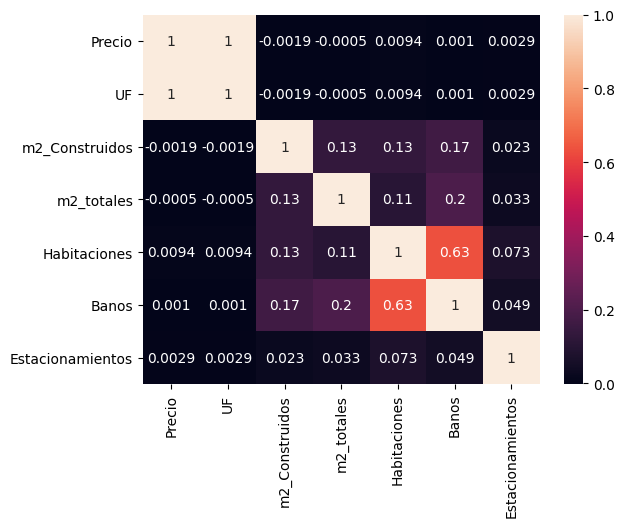

In [24]:
sns.heatmap(casa_rm.corr(), annot=True)

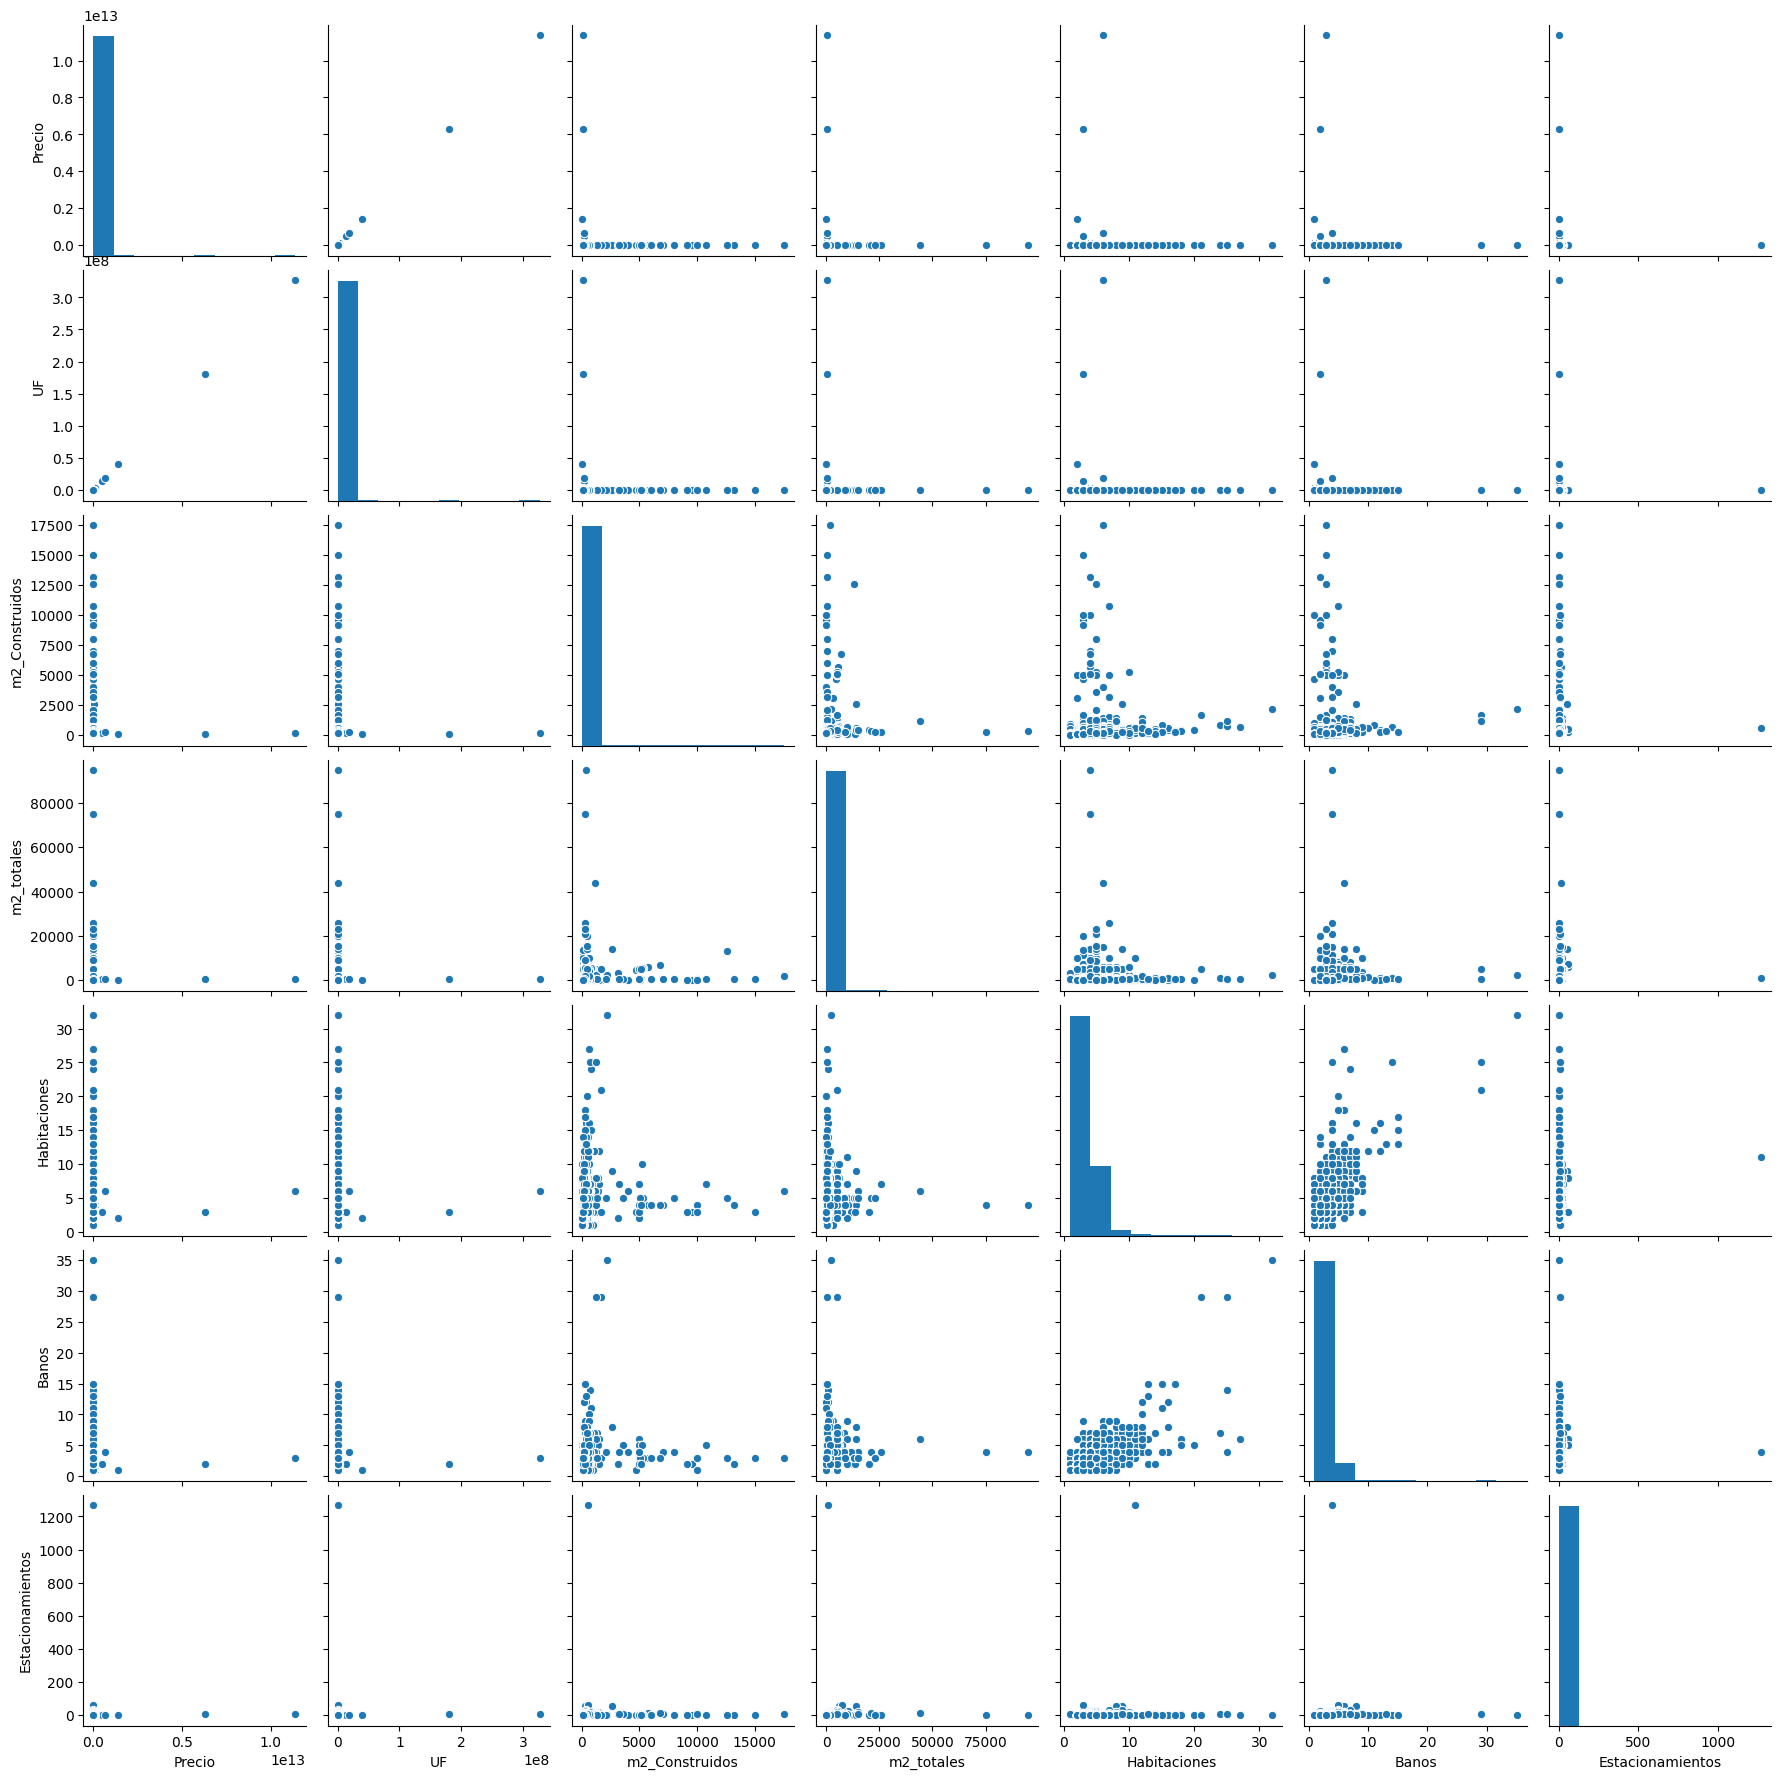

In [25]:
sns.pairplot(casa_rm)

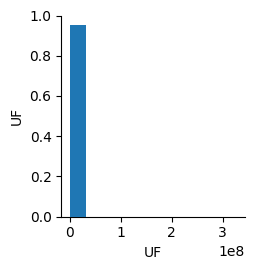

In [26]:
uf= ["UF"]
sns.pairplot(casa_rm[uf])

## Vamos a normalizar los valores de "UF", creando una nueva columna

In [27]:
casa_rm["UF_log"] = np.log1p(casa_rm["UF"]) # luego al precio en "UF_log" habrá que aplicar la funcion matematica inversa, back = np.expm1()
casa_rm.head(10)

,Direccion,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,UF_log
0,"Macul, Mario Silva Ossa 3923",266395950,7650,94,340,4,2,0,03/12/2022,8.942592
1,"Maipú, Mataquito 2239",3490,0,56,128,5,1,3,03/12/2022,0.000000
2,"Santiago, Campomar 4",870575000,25000,0,0,9,6,0,02/12/2022,10.126671
3,"Estación Central, Blanco Garcés 50",100081302,2874,72,72,3,2,0,02/12/2022,7.963808
4,"Estación Central, Avenida Las Parcelas",135809700,3900,59,243,3,1,2,02/12/2022,8.268988
5,"Santiago, Loreley 127",500000000,14358,209,434,5,4,0,01/12/2022,9.572132
6,"Peñalolén, Peñalolén, Región Metropolitana",150000000,4307,130,175,5,4,3,01/12/2022,8.368229
7,"Maipú, Av. Portales 1672",85000000,2440,55,121,2,1,2,01/12/2022,7.800163
8,"San Miguel, Álvarez de Toledo 900",470110500,13500,237,594,6,5,2,01/12/2022,9.510519
9,"Colina, Condominio Ayres de Chicureo",250029140,7180,120,420,3,3,2,01/12/2022,8.879194


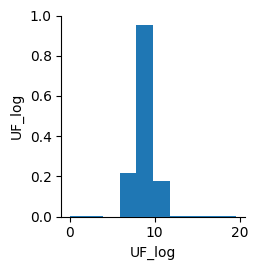

In [28]:
uf_log= ["UF_log"]
sns.pairplot(casa_rm[uf_log])

In [29]:
casa_rm.describe()

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,UF_log
count,5.958000e+03,5.958000e+03,5958.000000,5958.00000,5958.000000,5958.00000,5958.000000,5958.000000
mean,3.733205e+09,1.072109e+05,200.603390,557.68043,3.974488,2.57234,1.922122,8.718796
std,1.696535e+11,4.871883e+06,600.656993,2100.43853,1.725113,1.52833,16.603311,1.040615
min,2.200000e+03,0.000000e+00,0.000000,0.00000,1.000000,1.00000,0.000000,0.000000
25%,1.149159e+08,3.300000e+03,82.000000,120.00000,3.000000,2.00000,0.000000,8.101981
50%,1.800000e+08,5.168000e+03,120.000000,198.00000,4.000000,2.00000,1.000000,8.550435
75%,4.352875e+08,1.250000e+04,185.000000,390.00000,5.000000,3.00000,2.000000,9.433564
max,1.138712e+13,3.270000e+08,17525.000000,94929.00000,32.000000,35.00000,1269.000000,19.605471


## Separar la columna Direccion

In [30]:
casa_rm["Direccion"].str.split(",",expand=True)  
direc= casa_rm["Direccion"].str.split(",",expand=True)
direc.head(10)

,0,1,2,3,4,5,6
0,Macul,Mario Silva Ossa 3923,None,None,None,None,None
1,Maipú,Mataquito 2239,None,None,None,None,None
2,Santiago,Campomar 4,None,None,None,None,None
3,Estación Central,Blanco Garcés 50,None,None,None,None,None
4,Estación Central,Avenida Las Parcelas,None,None,None,None,None
5,Santiago,Loreley 127,None,None,None,None,None
6,Peñalolén,Peñalolén,Región Metropolitana,None,None,None,None
7,Maipú,Av. Portales 1672,None,None,None,None,None
8,San Miguel,Álvarez de Toledo 900,None,None,None,None,None
9,Colina,Condominio Ayres de Chicureo,None,None,None,None,None


In [31]:
direc.drop([2,3,4,5,6],axis=1)
direc=direc.drop([2,3,4,5,6],axis=1)

In [32]:
direc=direc.rename(columns={0:'Comuna',1:'direcc'})
direc


,Comuna,direcc
0,Macul,Mario Silva Ossa 3923
1,Maipú,Mataquito 2239
2,Santiago,Campomar 4
3,Estación Central,Blanco Garcés 50
4,Estación Central,Avenida Las Parcelas
...,...,...
5966,La Florida,Lia Aguirre / Vicuña Mackenna
5967,Las Condes,Camino Las Flores / Camino Piedra Roja
5968,La Pintana,Los Cipreses / Los Duraznos
5969,Talagante,Lucas Pacheco / Balmaceda


In [33]:
casa_rm = pd.concat([casa_rm, direc], axis= 1)#  unimos los dos dataframe 

In [34]:
casa_rm.head(10)

,Direccion,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,UF_log,Comuna,direcc
0,"Macul, Mario Silva Ossa 3923",266395950,7650,94,340,4,2,0,03/12/2022,8.942592,Macul,Mario Silva Ossa 3923
1,"Maipú, Mataquito 2239",3490,0,56,128,5,1,3,03/12/2022,0.000000,Maipú,Mataquito 2239
2,"Santiago, Campomar 4",870575000,25000,0,0,9,6,0,02/12/2022,10.126671,Santiago,Campomar 4
3,"Estación Central, Blanco Garcés 50",100081302,2874,72,72,3,2,0,02/12/2022,7.963808,Estación Central,Blanco Garcés 50
4,"Estación Central, Avenida Las Parcelas",135809700,3900,59,243,3,1,2,02/12/2022,8.268988,Estación Central,Avenida Las Parcelas
5,"Santiago, Loreley 127",500000000,14358,209,434,5,4,0,01/12/2022,9.572132,Santiago,Loreley 127
6,"Peñalolén, Peñalolén, Región Metropolitana",150000000,4307,130,175,5,4,3,01/12/2022,8.368229,Peñalolén,Peñalolén
7,"Maipú, Av. Portales 1672",85000000,2440,55,121,2,1,2,01/12/2022,7.800163,Maipú,Av. Portales 1672
8,"San Miguel, Álvarez de Toledo 900",470110500,13500,237,594,6,5,2,01/12/2022,9.510519,San Miguel,Álvarez de Toledo 900
9,"Colina, Condominio Ayres de Chicureo",250029140,7180,120,420,3,3,2,01/12/2022,8.879194,Colina,Condominio Ayres de Chicureo


In [35]:
casa_rm.drop(["Direccion"],axis= 1)
casa_rm = casa_rm.drop(["Direccion"],axis= 1)# eliminamos las columna "Direccion"


In [36]:
casa_rm.head(10)# comprobamos 

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,UF_log,Comuna,direcc
0,266395950,7650,94,340,4,2,0,03/12/2022,8.942592,Macul,Mario Silva Ossa 3923
1,3490,0,56,128,5,1,3,03/12/2022,0.000000,Maipú,Mataquito 2239
2,870575000,25000,0,0,9,6,0,02/12/2022,10.126671,Santiago,Campomar 4
3,100081302,2874,72,72,3,2,0,02/12/2022,7.963808,Estación Central,Blanco Garcés 50
4,135809700,3900,59,243,3,1,2,02/12/2022,8.268988,Estación Central,Avenida Las Parcelas
5,500000000,14358,209,434,5,4,0,01/12/2022,9.572132,Santiago,Loreley 127
6,150000000,4307,130,175,5,4,3,01/12/2022,8.368229,Peñalolén,Peñalolén
7,85000000,2440,55,121,2,1,2,01/12/2022,7.800163,Maipú,Av. Portales 1672
8,470110500,13500,237,594,6,5,2,01/12/2022,9.510519,San Miguel,Álvarez de Toledo 900
9,250029140,7180,120,420,3,3,2,01/12/2022,8.879194,Colina,Condominio Ayres de Chicureo


## Vamos a crear un nuevo feature donde identificaremos las casas con y sin segundo piso 

In [37]:
casa_rm["dif m2_totales - m2_constr"] = casa_rm["m2_totales"] - casa_rm["m2_Construidos"]

In [38]:
casa_rm[casa_rm["dif m2_totales - m2_constr"] < 0]
len(casa_rm[casa_rm["dif m2_totales - m2_constr"] < 0])

532

In [39]:
casa_rm["segunda_planta"] = np.where(casa_rm["dif m2_totales - m2_constr"] < 0, 1 , 0)# las casas con segundo piso tendran el valor 1 y las sin segundo piso 0

In [40]:
casa_rm.loc[casa_rm["dif m2_totales - m2_constr"] < 0, "dif m2_totales - m2_constr"] = 1

In [41]:
casa_rm.head(10)

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,UF_log,Comuna,direcc,dif m2_totales - m2_constr,segunda_planta
0,266395950,7650,94,340,4,2,0,03/12/2022,8.942592,Macul,Mario Silva Ossa 3923,246,0
1,3490,0,56,128,5,1,3,03/12/2022,0.000000,Maipú,Mataquito 2239,72,0
2,870575000,25000,0,0,9,6,0,02/12/2022,10.126671,Santiago,Campomar 4,0,0
3,100081302,2874,72,72,3,2,0,02/12/2022,7.963808,Estación Central,Blanco Garcés 50,0,0
4,135809700,3900,59,243,3,1,2,02/12/2022,8.268988,Estación Central,Avenida Las Parcelas,184,0
5,500000000,14358,209,434,5,4,0,01/12/2022,9.572132,Santiago,Loreley 127,225,0
6,150000000,4307,130,175,5,4,3,01/12/2022,8.368229,Peñalolén,Peñalolén,45,0
7,85000000,2440,55,121,2,1,2,01/12/2022,7.800163,Maipú,Av. Portales 1672,66,0
8,470110500,13500,237,594,6,5,2,01/12/2022,9.510519,San Miguel,Álvarez de Toledo 900,357,0
9,250029140,7180,120,420,3,3,2,01/12/2022,8.879194,Colina,Condominio Ayres de Chicureo,300,0


## Eliminamos errores de tipeo y outlier

Eliminar las casas que valen menos de 16M

In [42]:
casa_16m =casa_rm[casa_rm["Precio"] < 16000000] #  identificamos cuantas son 
casa_16m.head(10)

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,UF_log,Comuna,direcc,dif m2_totales - m2_constr,segunda_planta
1,3490,0,56,128,5,1,3,03/12/2022,0.000000,Maipú,Mataquito 2239,72,0
20,3700,0,103,256,3,1,1,29/11/2022,0.000000,Conchalí,Av. Pedro Fontova 5389,153,0
109,95000,2,130,160,4,2,0,16/11/2022,1.098612,Conchalí,Calle Cinco,30,0
174,3480,0,65,126,2,1,1,19/10/2022,0.000000,Pudahuel,El Poeta 7015,61,0
209,2620,0,75,330,4,3,1,29/08/2022,0.000000,Cerrillos,Huelen 7263,255,0
276,15000000,430,100,85,3,2,0,03/12/2022,6.066108,Las Condes,Las Condes C/ Tabancura,1,1
953,15000000,430,100,80,4,2,0,01/12/2022,6.066108,Las Condes,Las Condes C/ Tabancura,1,1
954,150000,4,100,80,4,2,0,01/12/2022,1.609438,Las Condes,Las Condes C/ Tabancura,1,1
1884,14500000,416,20,20,2,1,0,29/11/2022,6.033086,San Bernardo,Eyzaguirre,0,0
4220,8450,0,125,205,3,3,2,22/11/2022,0.000000,Peñalolén,Penalolen,80,0


In [43]:
len(casa_rm)

5958

In [44]:
len(casa_16m)

26

In [45]:
casa_rm.loc[casa_rm["Precio"] > 16000000]  #  las eliminamos 
casa_rm= casa_rm.loc[casa_rm["Precio"] > 16000000]


In [46]:
len(casa_rm) # corroboramos que se hayan eliminado correctamente

5932

Eliminar las casas que valgan desde de 2 * 10^9

In [47]:
casa_2MM=casa_rm[casa_rm["Precio"] > 2000000000] # identificamos cuantas son 
casa_2MM
len(casa_2MM)

31

In [48]:
casa_2MM

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,UF_log,Comuna,direcc,dif m2_totales - m2_constr,segunda_planta
167,485000000000,13927576,200,609,3,2,1,24/10/2022,16.449381,Ñuñoa,Metro Monseñor Eyzaguirre - L3,409,0
254,2785840000,80000,650,2250,5,6,6,03/12/2022,11.289794,Las Condes,Las Condes,1600,0
446,11387121000000,327000000,139,450,6,3,5,02/12/2022,19.605471,Maipú,Plaza de Maipú,311,0
492,4178760000,120000,2200,2200,32,35,0,02/12/2022,11.695255,Santiago,San Antonio con Alameda,0,0
624,2020080000,58461,350,850,5,5,2,02/12/2022,10.976132,Vitacura,Jardín del Este,500,0
658,6894954000,198000,2616,14233,9,8,55,02/12/2022,12.196027,Vitacura,Santa Maria Manquehe,11617,0
1101,2082415400,59800,600,1650,5,6,6,01/12/2022,10.998778,Lo Barnechea,Lo Barnechea,1050,0
1900,2611725000,75000,311,8341,5,7,4,29/11/2022,11.225257,Lo Barnechea,Sendero las lagunas,8030,0
1934,2085897700,59900,580,4000,6,6,8,29/11/2022,11.000448,Lo Barnechea,Casa 6 dormitorios en increible parque con sa...,3420,0
2901,2263495000,65000,550,14000,4,3,0,28/11/2022,11.082158,Pirque,Victoria Subercaseaux,13450,0


In [49]:
casa_rm.loc[casa_rm["Precio"] < 2000000000]  #  las eliminamos  las casas mayores 2 * 10^9
casa_rm= casa_rm.loc[casa_rm["Precio"] < 2000000000 ]

len(casa_rm)


5901

Eliminar las casas a que tengan menos de 70 m2 totales 

In [50]:
casa_70m=casa_rm[casa_rm["m2_totales"] < 70] # identificamos cuantas son 
casa_70m
len(casa_70m)

371

In [51]:
casa_rm.loc[casa_rm["m2_totales"] > 69]  # eliminamos  las casas que tengan menos de 70 m2
casa_rm= casa_rm.loc[casa_rm["m2_totales"] > 69]

len(casa_rm)

5530

Eliminar las casas que tengan igual o menos de 50 m2 construidos

In [52]:
casa_50m=casa_rm[casa_rm["m2_Construidos"] < 50] # identificamos cuantas son 
casa_50m
len(casa_50m)

112

In [53]:
casa_rm.loc[casa_rm["m2_Construidos"] > 49]  # eliminamos  las casas que tengan menos de 50 m2 construidos
casa_rm= casa_rm.loc[casa_rm["m2_Construidos"] > 49]

len(casa_rm)

5418

Eliminar las casas con mas de 12 estacionamientos

In [54]:
casa_E12=casa_rm[casa_rm["Estacionamientos"] > 12 ] # identificamos cuantas son 
casa_E12
len(casa_E12)

29

In [55]:
casa_rm.loc[casa_rm["Estacionamientos"] < 13]  # eliminamos  las casas que tengan menos de 50 m2 construidos
casa_rm= casa_rm.loc[casa_rm["Estacionamientos"]  < 13]

len(casa_rm)

5389

Eliminar las con más de 12 baños 

In [56]:
casa_b12=casa_rm[casa_rm["Banos"] > 12 ] # identificamos cuantas son 
casa_b12
len(casa_b12)

8

In [57]:
casa_rm.loc[casa_rm["Banos"] < 13]  # eliminamos  las casas que tengan menos de 50 m2 construidos
casa_rm= casa_rm.loc[casa_rm["Banos"]  < 13]

len(casa_rm)

5381

Eliminar las casas con mas de 12 Habitaciones 

In [58]:
casa_Hab12=casa_rm[casa_rm["Habitaciones"] > 12 ] # identificamos cuantas son 
casa_Hab12
len(casa_Hab12)

17

In [59]:
casa_rm.loc[casa_rm["Habitaciones"] < 13]  # eliminamos  las casas que tengan menos de 50 m2 construidos
casa_rm= casa_rm.loc[casa_rm["Habitaciones"]  < 13]

len(casa_rm)

5364

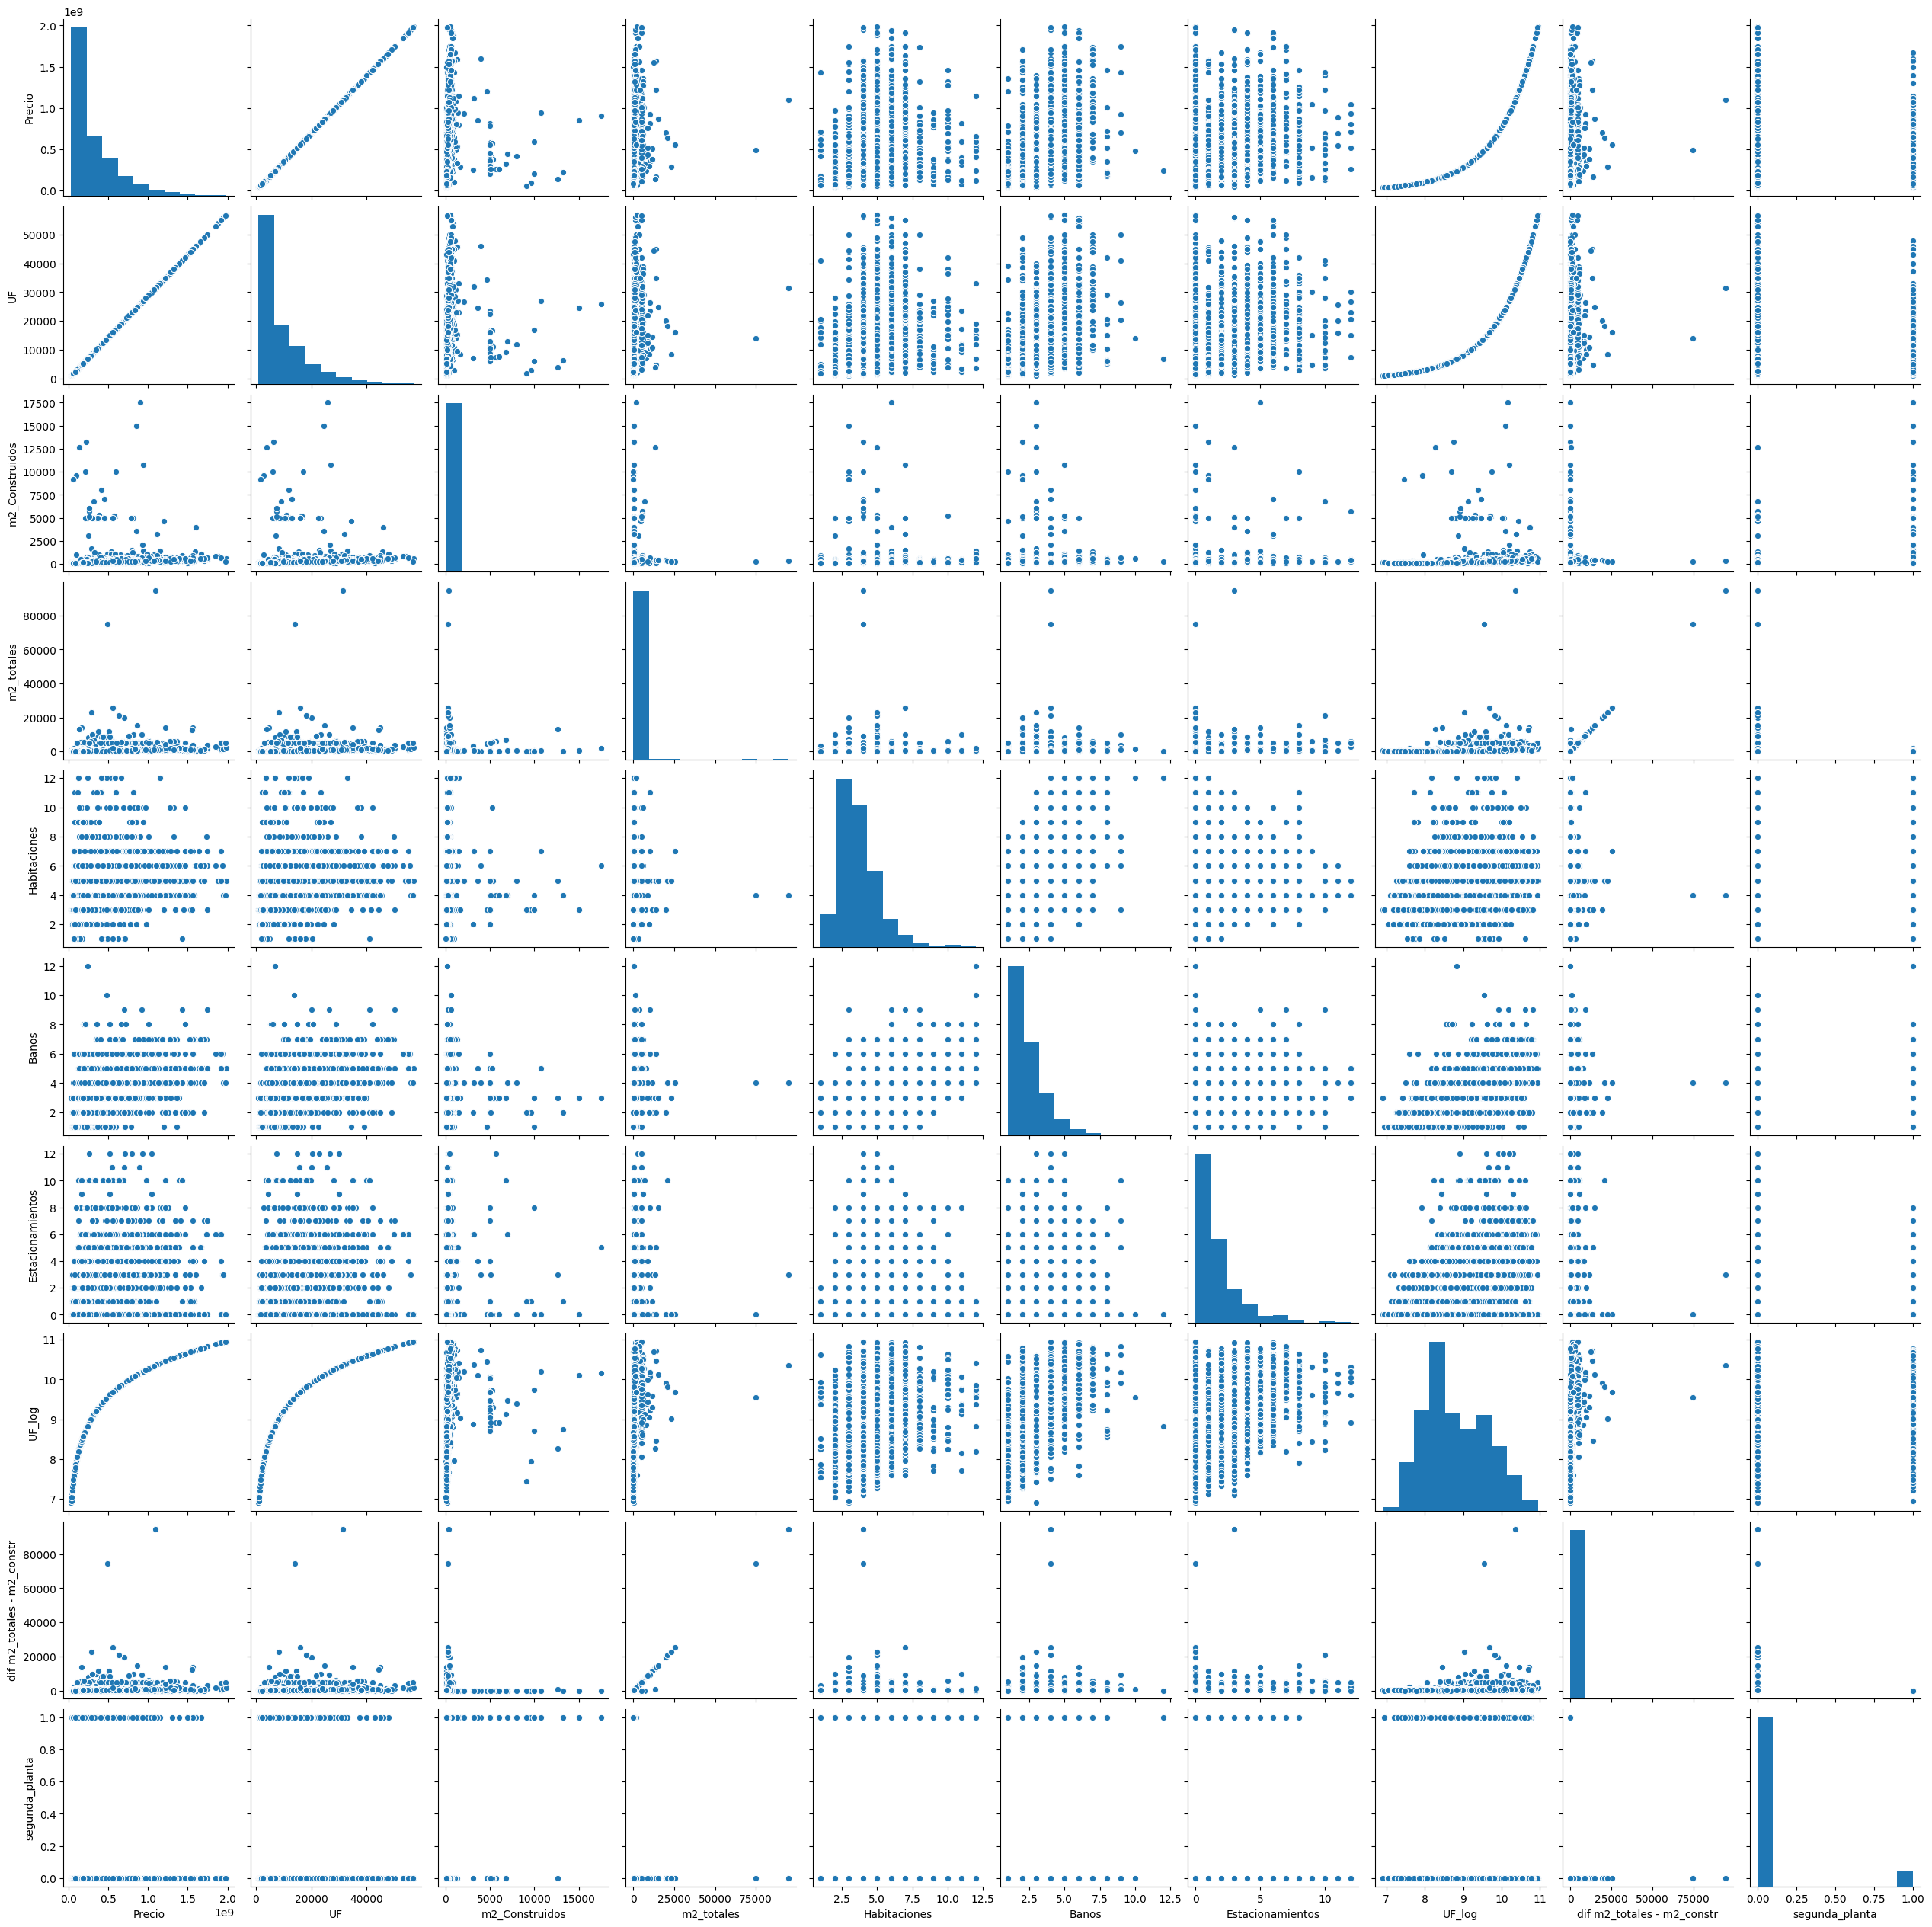

In [60]:
sns.pairplot(casa_rm)

In [61]:
casa_rm.describe()

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,UF_log,dif m2_totales - m2_constr,segunda_planta
count,5.364000e+03,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000
mean,3.273979e+08,9401.614280,209.858501,559.648770,3.976696,2.612043,1.655295,8.801063,384.590231,0.080537
std,3.028587e+08,8697.220235,627.514955,2066.542043,1.391893,1.280504,1.747412,0.816847,2016.484152,0.272148
min,3.482300e+07,1000.000000,50.000000,70.000000,1.000000,1.000000,0.000000,6.908755,0.000000,0.000000
25%,1.250000e+08,3589.000000,90.000000,131.000000,3.000000,2.000000,0.000000,8.185907,21.000000,0.000000
50%,1.962009e+08,5634.000000,128.000000,204.000000,4.000000,2.000000,1.000000,8.636752,79.000000,0.000000
75%,4.500000e+08,12922.000000,190.000000,400.000000,5.000000,3.000000,2.000000,9.466764,220.000000,0.000000
max,1.984911e+09,57000.000000,17525.000000,94929.000000,12.000000,12.000000,12.000000,10.950824,94602.000000,1.000000


### Vamos a quitar las columnas que en principio no nos aportan mayor informacion para nuestro futuro

In [62]:
casa_rm.drop(["direcc", "dif m2_totales - m2_constr"], axis= 1, inplace= True)

In [63]:
casa_rm

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,UF_log,Comuna,segunda_planta
0,266395950,7650,94,340,4,2,0,03/12/2022,8.942592,Macul,0
3,100081302,2874,72,72,3,2,0,02/12/2022,7.963808,Estación Central,0
4,135809700,3900,59,243,3,1,2,02/12/2022,8.268988,Estación Central,0
5,500000000,14358,209,434,5,4,0,01/12/2022,9.572132,Santiago,0
6,150000000,4307,130,175,5,4,3,01/12/2022,8.368229,Peñalolén,0
...,...,...,...,...,...,...,...,...,...,...,...
5965,633778600,18200,273,450,6,4,0,21/12/2021,9.809232,Huechuraba,0
5966,367730880,10560,145,220,6,4,1,20/12/2021,9.264923,La Florida,0
5968,557168000,16000,311,2011,4,2,1,17/12/2021,9.680406,La Pintana,0
5969,348160354,9998,225,366,5,3,0,17/12/2021,9.210240,Talagante,0


In [64]:
casa_rm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5364 entries, 0 to 5970
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Precio            5364 non-null   int64  
 1   UF                5364 non-null   int32  
 2   m2_Construidos    5364 non-null   int64  
 3   m2_totales        5364 non-null   int64  
 4   Habitaciones      5364 non-null   int64  
 5   Banos             5364 non-null   int64  
 6   Estacionamientos  5364 non-null   int64  
 7   Publi             5364 non-null   object 
 8   UF_log            5364 non-null   float64
 9   Comuna            5364 non-null   object 
 10  segunda_planta    5364 non-null   int32  
dtypes: float64(1), int32(2), int64(6), object(2)
memory usage: 461.0+ KB


In [65]:

status(casa_rm).sort_values(by="q_nan", ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Precio,0,0.0,0,0.000000,1504,int64
1,UF,0,0.0,0,0.000000,1436,int32
2,m2_Construidos,0,0.0,0,0.000000,454,int64
3,m2_totales,0,0.0,0,0.000000,838,int64
4,Habitaciones,0,0.0,0,0.000000,12,int64
5,Banos,0,0.0,0,0.000000,11,int64
6,Estacionamientos,0,0.0,1673,0.311894,13,int64
7,Publi,0,0.0,0,0.000000,135,object
8,UF_log,0,0.0,0,0.000000,1436,float64
9,Comuna,0,0.0,0,0.000000,50,object


In [66]:
len(casa_rm)

5364

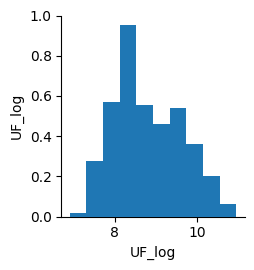

In [69]:
uf_log= ["UF_log"]
sns.pairplot(casa_rm[uf_log])

In [67]:
#casa_rm.to_excel("data/clean_data.xlsx", index = False)